In [73]:
import numpy as np
import pandas as pd

In [74]:
df = pd.read_csv('Iris.csv')

In [75]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
df = df.iloc[:,1:]

In [77]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [79]:
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
df=df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']] #removing class 0 and other columns than this

In [81]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

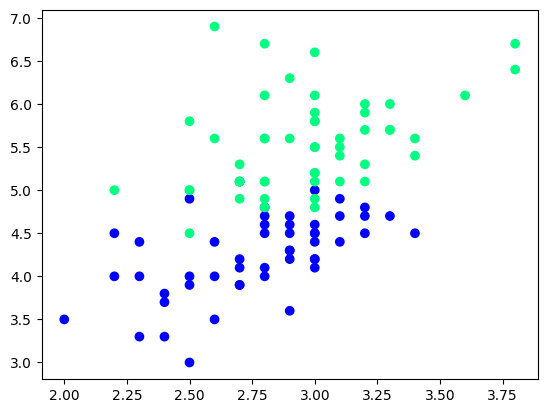

In [83]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [84]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:80,:].sample(10)
df_test = df.iloc[80:,:].sample(5)
df_train

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
117,3.8,6.7,2
125,3.2,6.0,2
127,3.0,4.9,2
114,2.8,5.1,2
63,2.9,4.7,1
133,2.8,5.1,2
96,2.9,4.2,1
144,3.3,5.7,2
108,2.5,5.8,2


In [85]:
print(df_test)

X_test=df_test.iloc[:,0:2].values
y_test=df_test.iloc[:,-1].values

     SepalWidthCm  PetalLengthCm  Species
129           3.0            5.8        2
71            2.8            4.0        1
137           3.1            5.5        2
148           3.4            5.4        2
100           3.3            6.0        2


In [86]:
#bagging
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,-1].values

print(df_bag)

     SepalWidthCm  PetalLengthCm  Species
124           3.3            5.7        2
124           3.3            5.7        2
144           3.3            5.7        2
133           2.8            5.1        2
124           3.3            5.7        2
133           2.8            5.1        2
124           3.3            5.7        2
133           2.8            5.1        2


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [88]:
dt_bag1 = DecisionTreeClassifier()

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    #plot_decision_regions(X.values, y.values, clf=clf, legend=2)  not working because of version issue
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

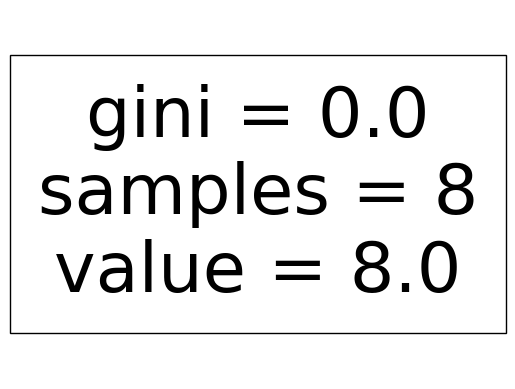

0.8


In [89]:
evaluate(dt_bag1,X,y)

In [90]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,-1].values

df_bag

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
124,3.3,5.7,2
133,2.8,5.1,2
108,2.5,5.8,2
63,2.9,4.7,1
124,3.3,5.7,2
144,3.3,5.7,2
125,3.2,6.0,2


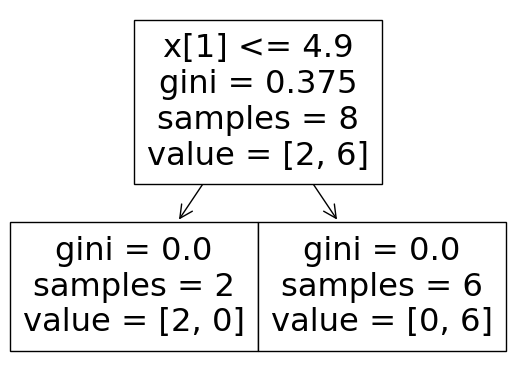

1.0


In [91]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [92]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,-1].values

df_bag

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
144,3.3,5.7,2
96,2.9,4.2,1
124,3.3,5.7,2
124,3.3,5.7,2
127,3.0,4.9,2
114,2.8,5.1,2
133,2.8,5.1,2


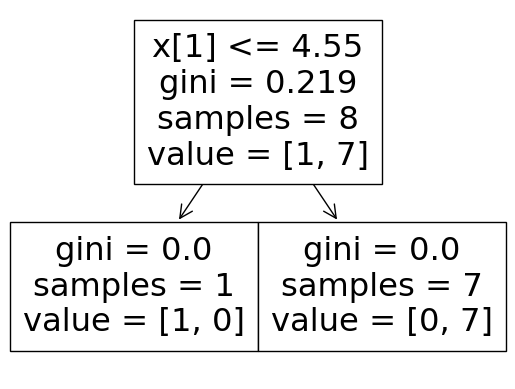

1.0


In [93]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [94]:
df_test

,SepalWidthCm,PetalLengthCm,Species
129,3.0,5.8,2
71,2.8,4.0,1
137,3.1,5.5,2
148,3.4,5.4,2
100,3.3,6.0,2


In [97]:
print("Predictor 1",dt_bag1.predict(np.array([2.8,	3.4]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.8,	3.4]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.8,	3.4]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [1]
